# 2. Lineages reconstruction

Here we will breifly explain how we can reconstruct lineages in *AdaScape*. We provide routines to build phylogenetic trees using [dendropy](https://dendropy.org/), which is a Python library to analyze phylogenetics trees. Also we use here [toytree](https://toytree.readthedocs.io/en/latest/), and [toyplot](https://toyplot.readthedocs.io/en/stable/) libraries to visualze such trees. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import extra_func as ext

First we start by building a simple environment as done in [the previous notebook](./2.basic_execution_ecoevomodel.ipynb).

In [2]:
length = (250, 250)
spacing = (1, 1)

x, y = np.meshgrid(*[np.arange(0, l+s, s) for l, s in zip(length, spacing)])

environment = x * 10

We then run a model, for example, without trait-mediated competition and plot the temporal and trait dynamics for visual inspection of the results

In [3]:
df1 = ext.single_model_run(environment, x, y)

<IR12SpeciationModel (individuals: not initialized)>
Parameters:
    random_seed: 1234
    always_direct_parent: True
    on_extinction: warn
    taxon_threshold: 0.075
    taxon_def: traits
    rho: 0
    nb_radius: 50
    car_cap: 50
    sigma_env_fitness: 0.2
    sigma_disp: 30
    sigma_mut: 0.05
    mut_prob: 0.005
    sigma_comp_trait: 1.0



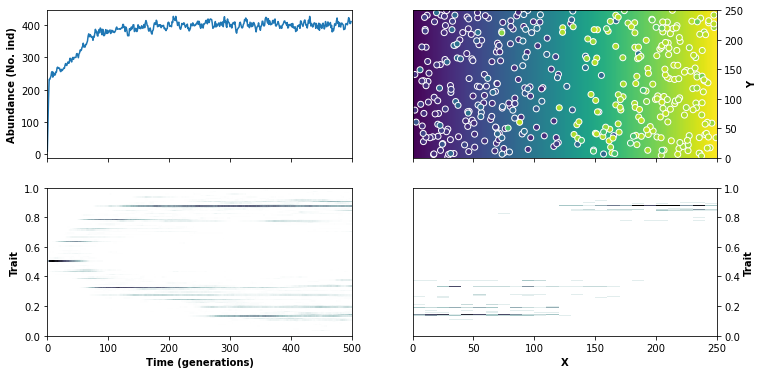

In [4]:
ext.plot_temp_dyn_1trait(df1, environment, x)

Then we can transform our taxon_id and ancestor_id information into a [dendropy.Tree](https://dendropy.org/primer/trees.html) by using our custoum-made pandas accessor **ptree** and the method **to_dendropy_tree**. 

In [5]:
tree1 = df1.ptree.to_dendropy_tree()

One ca visulize this tree using the dendropy's [print_plot](https://dendropy.org/primer/trees.html?highlight=print_plot#viewing-and-displaying-trees) method or [toytree's](https://toytree.readthedocs.io/en/latest/Cookbook.html#6.-Plot-histograms-associated-with-tip-trait-values-(ridge-plot), which we have coded into the function **toytree_plot**.

In [6]:
tree1.print_plot()

                                                    ++++++++++++++++++++++ 1186
 ++++++++++++++++++++++++++++++++++++++++++++++++++++                          
 |                                                  ++++++++++++++++++++++ 1187
++                                                                             
 |                            ++++++++++++++++++++++++++++++++++++++++++++ 1188
 ++++++++++++++++++++++++++++++                                                
                              \----------------------------------+++++++++ 566 
                                                                               
                                                                               


In [7]:
ext.toytree_plot(tree1, df1)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="400.0px" viewBox="0 0 300.0 400.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t2dc8ccb6db5a480a982405cbb8f269a0"> <polygon points="200.0,125.0 201.53061224489795,125.0 203.0612244897959,125.0 204.59183673469389,125.0 206.12244897959187,125.0 207.6530612244898,125.0 209.18367346938774,125.0 210.71428571428572,125.0 212.24489795918367,125.0 213.77551020408163,125.0 215.30612244897958,125.0 216.83673469387753,125.0 218.36734693877548,125.0 219.8979591836735,125.0 221.42857142857144,125.0 222.9591836734694,125.0 224.48979591836735,125.0 226.0204081632653,125.0 227.55102040816325,125.0 229.0816326530612,125.0 230.61224489795916,125.0 232.1428571428571,125.0 233.6734693877551,125.0 235.20408163265304,125.0 236.73469387755102,125.0 238.26530612244898,125.0 239.79591836734693,125.0 241.3265306122449,125.0 242.85714285714286,125.0 244.3877551020408,125.0 245.91836734693877,125.0 247.44897959183675,125.0 248.9795918367347,125.0 250.51020408163265,125.0 252.0408163265306,125.0 253.57142857142858,125.0 255.10204081632654,125.0 256.6326530612245,125.0 258.16326530612247,125.0 259.6938775510204,125.0 261.2244897959184,125.0 262.7551020408163,125.0 264.2857142857143,125.0 265.81632653061223,125.0 267.3469387755102,125.0 268.8775510204082,125.0 270.4081632653061,125.0 271.9387755102041,125.0 273.469387755102,125.0 275.0,125.0 275.0,125.0 273.469387755102,125.0 271.9387755102041,125.0 270.4081632653061,124.99999999999986 268.8775510204082,124.99999999956371 267.3469387755102,124.99999955992192 265.81632653061223,124.99985240210793 264.2857142857143,124.98353490458898 262.7551020408163,124.38823652651314 261.2244897959184,117.38346811287323 259.6938775510204,92.40367619622688 258.16326530612247,72.11023142117352 256.6326530612245,80.04420837952802 255.10204081632654,72.64962689422583 253.57142857142858,31.25 252.0408163265306,47.75433612337607 250.51020408163265,103.2032426238564 248.9795918367347,122.9500256106742 247.44897959183675,124.93588592152199 245.91836734693877,124.99933331241573 244.3877551020408,124.99999769512125 242.85714285714286,124.99999999735071 241.3265306122449,124.999999999999 239.79591836734693,125.0 238.26530612244898,125.0 236.73469387755102,125.0 235.20408163265304,125.0 233.6734693877551,125.0 232.1428571428571,125.0 230.61224489795916,125.0 229.0816326530612,125.0 227.55102040816325,125.0 226.0204081632653,125.0 224.48979591836735,125.0 222.9591836734694,125.0 221.42857142857144,125.0 219.8979591836735,125.0 218.36734693877548,125.0 216.83673469387753,125.0 215.30612244897958,125.0 213.77551020408163,125.0 212.24489795918367,125.0 210.71428571428572,125.0 209.18367346938774,125.0 207.6530612244898,125.0 206.12244897959187,125.0 204.59183673469389,125.0 203.0612244897959,125.0 201.53061224489795,125.0 200.0,125.0" style="fill:rgb(40%,76.1%,64.7%);fill-opacity:1.0;opacity:1.0;stroke:rgb(100%,100%,100%);stroke-opacity:1.0;stroke-width:0.5"> 1186 <polygon points="200.0,200.0 201.53061224489795,200.0 203.0612244897959,200.0 204.59183673469389,200.0 206.12244897959187,200.0 207.6530612244898,200.0 209.18367346938774,200.0 210.71428571428572,200.0 212.24489795918367,200.0 213.77551020408163,200.0 215.30612244897958,200.0 216.83673469387753,200.0 218.36734693877548,200.0 219.8979591836735,200.0 221.42857142857144,200.0 222.9591836734694,200.0 224.48979591836735,200.0 226.0204081632653,200.0 227.55102040816325,200.0 229.0816326530612,200.0 230.61224489795916,200.0 232.1428571428571,200.0 233.6734693877551,200.0 235.20408163265304,200.0 236.73469387755102,200.0 238.26530612244898,200.0 239.7959183673469

We can then genereate another model run, for example, with trait-mediated competition to compare the differences in lineages reconstruction.

In [8]:
df2 = ext.single_model_run(environment, x, y, sigma_comp_trait=0.20, car_cap=30)

<IR12SpeciationModel (individuals: not initialized)>
Parameters:
    random_seed: 1234
    always_direct_parent: True
    on_extinction: warn
    taxon_threshold: 0.075
    taxon_def: traits
    rho: 0
    nb_radius: 50
    car_cap: 30
    sigma_env_fitness: 0.2
    sigma_disp: 30
    sigma_mut: 0.05
    mut_prob: 0.005
    sigma_comp_trait: 0.2



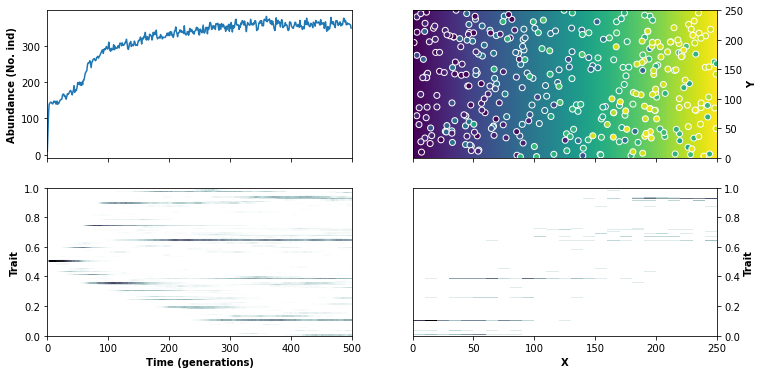

In [9]:
ext.plot_temp_dyn_1trait(df2, environment, x)

In [10]:
tree2 = df2.ptree.to_dendropy_tree()

In [11]:
tree2.print_plot()

                 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 2406
            ++++++                                                             
        +++++    +++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 2407
        |   |                                                                  
        |   ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 2408
+++++++++                                                                      
        |+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 2409
        |                                                                      
        |                                           ++++++++++++++++++++++ 2410
        +                                       /++++                          
        |                                       |   |              +++++++ 2411
        |                                       |   ++++++++++++++++           
        ++++++++++++++++++++++++++++++++

In [12]:
ext.toytree_plot(tree2, df2)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="400.0px" viewBox="0 0 300.0 400.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t9c4848d3f0194669b0f03133a6fd3034"> <polygon points="200.0,150.0 201.53061224489795,150.0 203.0612244897959,150.0 204.59183673469389,150.0 206.12244897959187,150.0 207.6530612244898,150.0 209.18367346938774,150.0 210.71428571428572,150.0 212.24489795918367,150.0 213.77551020408163,150.0 215.30612244897958,150.0 216.83673469387753,150.0 218.36734693877548,150.0 219.8979591836735,150.0 221.42857142857144,150.0 222.9591836734694,150.0 224.48979591836735,150.0 226.0204081632653,150.0 227.55102040816325,150.0 229.0816326530612,150.0 230.61224489795916,150.0 232.1428571428571,150.0 233.6734693877551,150.0 235.20408163265304,150.0 236.73469387755102,150.0 238.26530612244898,150.0 239.79591836734693,150.0 241.3265306122449,150.0 242.85714285714286,150.0 244.3877551020408,150.0 245.91836734693877,150.0 247.44897959183675,150.0 248.9795918367347,150.0 250.51020408163265,150.0 252.0408163265306,150.0 253.57142857142858,150.0 255.10204081632654,150.0 256.6326530612245,150.0 258.16326530612247,150.0 259.6938775510204,150.0 261.2244897959184,150.0 262.7551020408163,150.0 264.2857142857143,150.0 265.81632653061223,150.0 267.3469387755102,150.0 268.8775510204082,150.0 270.4081632653061,150.0 271.9387755102041,150.0 273.469387755102,150.0 275.0,150.0 275.0,149.61964381483736 273.469387755102,142.96094654508607 271.9387755102041,130.6106053564436 270.4081632653061,115.53394405239496 268.8775510204082,108.33333333333331 267.3469387755102,144.8573576308612 265.81632653061223,143.6570270945761 264.2857142857143,148.29899296295363 262.7551020408163,149.95520427747348 261.2244897959184,149.41953494365413 259.6938775510204,149.0349621227 258.16326530612247,149.92691386419347 256.6326530612245,149.99974786726196 255.10204081632654,149.9999999603789 253.57142857142858,149.99999999999972 252.0408163265306,150.0 250.51020408163265,150.0 248.9795918367347,150.0 247.44897959183675,150.0 245.91836734693877,150.0 244.3877551020408,150.0 242.85714285714286,150.0 241.3265306122449,150.0 239.79591836734693,150.0 238.26530612244898,150.0 236.73469387755102,150.0 235.20408163265304,150.0 233.6734693877551,150.0 232.1428571428571,150.0 230.61224489795916,150.0 229.0816326530612,150.0 227.55102040816325,150.0 226.0204081632653,150.0 224.48979591836735,150.0 222.9591836734694,150.0 221.42857142857144,150.0 219.8979591836735,150.0 218.36734693877548,150.0 216.83673469387753,150.0 215.30612244897958,150.0 213.77551020408163,150.0 212.24489795918367,150.0 210.71428571428572,150.0 209.18367346938774,150.0 207.6530612244898,150.0 206.12244897959187,150.0 204.59183673469389,150.0 203.0612244897959,150.0 201.53061224489795,150.0 200.0,150.0" style="fill:rgb(40%,76.1%,64.7%);fill-opacity:1.0;opacity:1.0;stroke:rgb(100%,100%,100%);stroke-opacity:1.0;stroke-width:0.5"> 2407 <polygon points="200.0,183.33333333333331 201.53061224489795,183.33333333333331 203.0612244897959,183.33333333333331 204.59183673469389,183.33333333333331 206.12244897959187,183.33333333333331 207.6530612244898,183.33333333333331 209.18367346938774,183.33333333333331 210.71428571428572,183.33333333333331 212.24489795918367,183.33333333333331 213.77551020408163,183.33333333333331 215.30612244897958,183.33333333333331 216.83673469387753,183.33333333333331 218.36734693877548,183.33333333333331 219.8979591836735,183.33333333333331 221.42857142857144,183.33333333333331 222.9591836734694,183.33333333333331 224.48979591836735,183.33333333333331 226.0204081632653,183.33333333333331 227.55102040816325,183.33333333

## Tree summary statistics 

[Dendropy](https://dendropy.org/primer/index.html) also offer a suite of methods to compute metrics of phylogenetic trees, which can be use to compare results between model runs. As well as method to manipulate the trees and export them to different formats. For example below we will compute common metrics of phylogenetic diversity from the above trees to compare them,

### Phylogenetic diversity (PD)

In [13]:
sum(tree1.calc_node_root_distances())

1758.0

In [14]:
sum(tree2.calc_node_root_distances())

4359.0

### Mean pairwise distance (MPD)

In [15]:
pdm1=tree1.phylogenetic_distance_matrix()

In [16]:
pdm1.mean_pairwise_distance()

676.6666666666666

In [17]:
pdm2=tree2.phylogenetic_distance_matrix()

In [18]:
pdm2.mean_pairwise_distance()

670.6111111111111

### Mean neighbor taxon distance (MNTD)

In [19]:
pdm1.mean_nearest_taxon_distance()

320.0

In [20]:
pdm2.mean_nearest_taxon_distance()

392.22222222222223

### Lineages through time (LTT)

In [21]:
time_steps1 = np.linspace(0, tree1.max_distance_from_root(), 50)
ltt1=[tree1.num_lineages_at(t) for t in time_steps1]
time_steps2 = np.linspace(0, tree2.max_distance_from_root(), 50)
ltt2 = [tree2.num_lineages_at(t) for t in time_steps2]

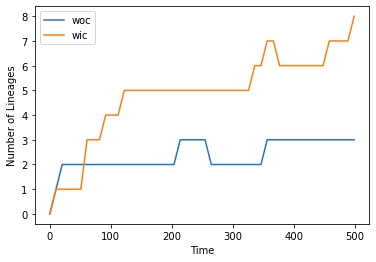

In [22]:
plt.plot(time_steps1, ltt1, label='woc')
plt.plot(time_steps2, ltt2, label='wic')
plt.xlabel('Time')
plt.ylabel('Number of Lineages')
plt.legend()